# Анализ тарифных планов
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашеи распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Предобработка данных

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
try:
    calls = pd.read_csv(--)
except:
    calls = pd.read_csv('/datasets/calls.csv.')
    
try:
    internet = pd.read_csv(--)
except:
    internet = pd.read_csv('/datasets/internet.csv.')
    
try:
    messages = pd.read_csv(--)
except:
    messages = pd.read_csv('/datasets/messages.csv.')
    
try:
    tariffs = pd.read_csv(--)
except:
    tariffs = pd.read_csv('/datasets/tariffs.csv.')
    
try:
    users = pd.read_csv(--)
except:
    users = pd.read_csv('/datasets/users.csv.')

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


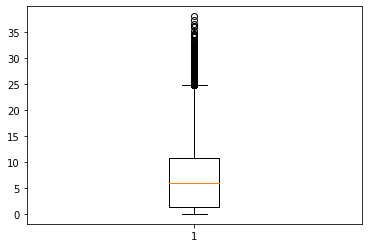

In [5]:
plt.boxplot(calls['duration'])
plt.show()

In [6]:
calls.duplicated().sum()

0

In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


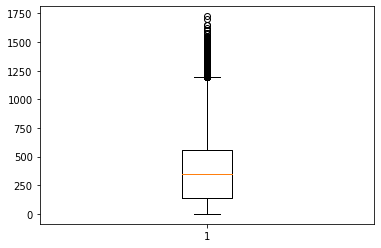

In [9]:
plt.boxplot(internet['mb_used'])
plt.show()

In [10]:
internet.duplicated().sum()

0

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


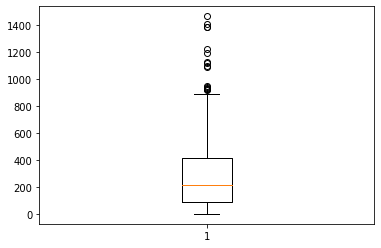

In [13]:
messages_gr = messages.groupby('user_id')['id'].count()
plt.boxplot(messages_gr)
plt.show()

In [14]:
messages.duplicated().sum()

0

In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


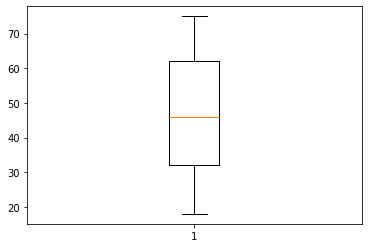

In [19]:
plt.boxplot(users['age'])
plt.show()

In [20]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [21]:
users.duplicated().sum()

0

В данных есть значения отклоняющиеся от нормы но они вполне вероятны.

В internet есть лишний столбец 'Unnamed: 0', удалим его. Так же заменим где необходимо тип на datetime 

In [22]:
del internet['Unnamed: 0']

In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month

messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

users['churn_date'] = pd.to_datetime(users['churn_date'])

## Расчеты

Посчитаем для каждого пользователя израсходованных: минут, сообщений трафика. 

In [24]:
def math_ceil(col):
    col = math.ceil(col)
    return col
#округлим значения к большему согласно правилам(минуты округляются сразу)
calls['duration'] = calls['duration'].apply(math_ceil)
calls_user_gr = calls.groupby(['user_id','month'], as_index=False)[['duration']].sum()
calls_count_gr = calls.groupby(['user_id','month'], as_index=False)[['id']].count()
calls_user_gr = pd.merge(calls_user_gr, calls_count_gr, how='outer', on=['user_id','month'])
calls_user_gr.columns = ['user_id','month','duration','calls_count']

internet_user_gr = internet.groupby(['user_id','month'], as_index=False)[['mb_used']].sum()
#переведем мегабайты в гигабайты
internet_user_gr['mb_used'] = internet_user_gr['mb_used'].apply(math_ceil)

messages_user_gr = messages.groupby(['user_id','month'], as_index=False)[['id']].count()
messages_user_gr.columns = ['user_id','month','messages_count']

In [25]:
calls_user_gr

,user_id,month,duration,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


Соеденим данные в одну таблицу

In [26]:
user_spending = pd.merge(calls_user_gr, internet_user_gr, on=['user_id','month'], how='outer')
user_spending = user_spending.merge(messages_user_gr, on=['user_id','month'], how='outer')
user_spending = user_spending.merge(users.loc[:,['user_id','tariff','city']], on='user_id', how='left')
user_spending = user_spending.rename({'tariff': 'tariff_name'}, axis=1)
user_spending

,user_id,month,duration,calls_count,mb_used,messages_count,tariff_name,city
0,1000,5,159.0,22.0,2254.0,22.0,ultra,Краснодар
1,1000,6,172.0,43.0,23234.0,60.0,ultra,Краснодар
2,1000,7,340.0,47.0,14004.0,75.0,ultra,Краснодар
3,1000,8,408.0,52.0,14056.0,81.0,ultra,Краснодар
4,1000,9,466.0,58.0,14569.0,57.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11051.0,17.0,smart,Санкт-Петербург
3210,1489,9,NaN,NaN,17207.0,32.0,smart,Санкт-Петербург
3211,1489,10,NaN,NaN,19560.0,21.0,smart,Санкт-Петербург
3212,1489,11,NaN,NaN,17492.0,20.0,smart,Санкт-Петербург


In [27]:
user_spending.isna().sum()

user_id             0
month               0
duration           40
calls_count        40
mb_used            11
messages_count    497
tariff_name         0
city                0
dtype: int64

In [28]:
user_spending = user_spending.fillna(0)

In [29]:
user_spending.isna().sum()

user_id           0
month             0
duration          0
calls_count       0
mb_used           0
messages_count    0
tariff_name       0
city              0
dtype: int64

Напишем функцию расчитывающую значения превышаюшие значения включенные в тариф, и расчитаем их.

In [30]:
def value_over_tariff(data, column, need_column, tariff_column):
    for tariff_n in data['tariff_name'].unique():
        for tariff_value in tariffs.loc[tariffs['tariff_name'] == tariff_n, tariff_column].unique():
            data.loc[data['tariff_name'] == tariff_n, need_column] = data.loc[data['tariff_name'] == tariff_n, column] - tariff_value   
    return data   

In [31]:
user_spending = value_over_tariff(user_spending, 'messages_count', 'messages_over_tariff', 'messages_included')
user_spending = value_over_tariff(user_spending, 'mb_used', 'gb_over_tariff', 'mb_per_month_included')
user_spending['gb_over_tariff'] = (user_spending['gb_over_tariff'] / 1024)
user_spending['gb_over_tariff'] = user_spending['gb_over_tariff'].apply(math_ceil)
user_spending = value_over_tariff(user_spending, 'duration', 'minutes_over_tariff', 'minutes_included')

In [32]:
user_spending.loc[user_spending['messages_over_tariff'] < 0, 'messages_over_tariff'] = 0
user_spending.loc[user_spending['gb_over_tariff'] < 0, 'gb_over_tariff'] = 0
user_spending.loc[user_spending['minutes_over_tariff'] < 0, 'minutes_over_tariff'] = 0

In [33]:
user_spending

,user_id,month,duration,calls_count,mb_used,messages_count,tariff_name,city,messages_over_tariff,gb_over_tariff,minutes_over_tariff
0,1000,5,159.0,22.0,2254.0,22.0,ultra,Краснодар,0.0,0,0.0
1,1000,6,172.0,43.0,23234.0,60.0,ultra,Краснодар,0.0,0,0.0
2,1000,7,340.0,47.0,14004.0,75.0,ultra,Краснодар,0.0,0,0.0
3,1000,8,408.0,52.0,14056.0,81.0,ultra,Краснодар,0.0,0,0.0
4,1000,9,466.0,58.0,14569.0,57.0,ultra,Краснодар,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11051.0,17.0,smart,Санкт-Петербург,0.0,0,0.0
3210,1489,9,0.0,0.0,17207.0,32.0,smart,Санкт-Петербург,0.0,2,0.0
3211,1489,10,0.0,0.0,19560.0,21.0,smart,Санкт-Петербург,0.0,5,0.0
3212,1489,11,0.0,0.0,17492.0,20.0,smart,Санкт-Петербург,0.0,3,0.0


Напишем функцию которая расчитывает во сколько обошлось превышения значений включенных в тариф. 

In [34]:
def price_over_tariff(data, column, need_column, tariff_column):
    for tariff_n in data['tariff_name'].unique():
        for tariff_value in tariffs.loc[tariffs['tariff_name'] == tariff_n, tariff_column].unique():
                data.loc[data['tariff_name'] == tariff_n, need_column] = data.loc[
                    data['tariff_name'] == tariff_n, column] * tariff_value
    return data   

In [35]:
user_spending = price_over_tariff(user_spending, 'messages_over_tariff', 'mes_over_t_price', 'rub_per_message')
user_spending = price_over_tariff(user_spending, 'gb_over_tariff', 'gb_over_t_price', 'rub_per_gb')
user_spending = price_over_tariff(user_spending, 'minutes_over_tariff', 'min_over_t_price', 'rub_per_minute')

Посчитаем общую выручку с каждого пользователя включая абонетскую плату.

In [36]:
user_spending['cost_per_month'] = \
    user_spending['mes_over_t_price']\
    + user_spending['gb_over_t_price']\
    + user_spending['min_over_t_price']

user_spending = pd.merge(user_spending, tariffs, on='tariff_name', how='left')

user_spending.loc[user_spending['tariff_name'] == 'ultra', 'cost_per_month'] =\
    user_spending.loc[user_spending['tariff_name'] == 'ultra', 'cost_per_month'] + user_spending.loc[
    user_spending['tariff_name'] == 'ultra', 'rub_monthly_fee']

user_spending.loc[user_spending['tariff_name'] == 'smart', 'cost_per_month'] =\
    user_spending.loc[user_spending['tariff_name'] == 'smart', 'cost_per_month'] + user_spending.loc[
    user_spending['tariff_name'] == 'smart', 'rub_monthly_fee']

In [37]:
user_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 22 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration                 3214 non-null float64
calls_count              3214 non-null float64
mb_used                  3214 non-null float64
messages_count           3214 non-null float64
tariff_name              3214 non-null object
city                     3214 non-null object
messages_over_tariff     3214 non-null float64
gb_over_tariff           3214 non-null int64
minutes_over_tariff      3214 non-null float64
mes_over_t_price         3214 non-null float64
gb_over_t_price          3214 non-null float64
min_over_t_price         3214 non-null float64
cost_per_month           3214 non-null float64
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb      

In [73]:
user_spending.cost_per_month.describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: cost_per_month, dtype: float64

In [38]:
user_spending.head()

,user_id,month,duration,calls_count,mb_used,messages_count,tariff_name,city,messages_over_tariff,gb_over_tariff,...,gb_over_t_price,min_over_t_price,cost_per_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2254.0,22.0,ultra,Краснодар,0.0,0,...,0.0,0.0,1950.0,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,23234.0,60.0,ultra,Краснодар,0.0,0,...,0.0,0.0,1950.0,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,14004.0,75.0,ultra,Краснодар,0.0,0,...,0.0,0.0,1950.0,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,14056.0,81.0,ultra,Краснодар,0.0,0,...,0.0,0.0,1950.0,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,14569.0,57.0,ultra,Краснодар,0.0,0,...,0.0,0.0,1950.0,1000,30720,3000,1950,150,1,1


## Анализ

### Данные о звонках

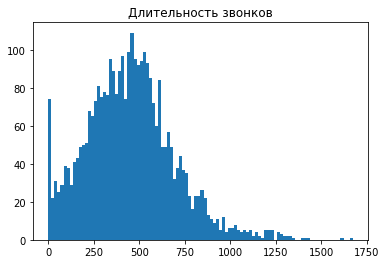

In [39]:
plt.hist(user_spending['duration'], bins=100)
plt.title('Длительность звонков')
plt.show()

Сравним графики для каждого тарифа.

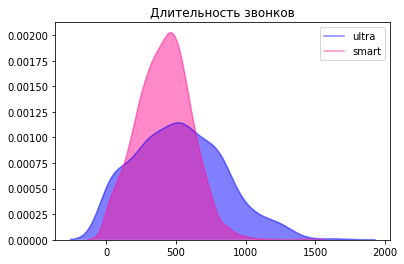

In [40]:
sns.kdeplot(user_spending.loc[user_spending['tariff_name'] == 'ultra','duration'],
            color='blue',
            shade=True,
            alpha = 0.5,
            label = 'ultra')
sns.kdeplot(user_spending.loc[user_spending['tariff_name'] == 'smart','duration'], color='deeppink',
            shade=True, 
            alpha = 0.5,
            label = 'smart')
plt.legend()
plt.title('Длительность звонков')
plt.show()

Исходя из графика мы видим что пользователи тарифа 'ultra' в среднем тратят больше минут, но длительность разговоров крайне редко превышает 1500 соответственно пользователи редко использую хотя бы половину включенных в тариф минут. С пользователями тарифа 'smart' другая ситуация по большей части они гораздо ближе к предельному значению включенных в тариф минут.

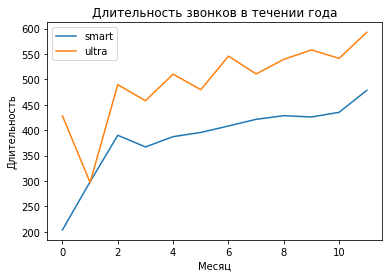

In [41]:
ultra_duration_mean_gr = user_spending.loc[
    user_spending['tariff_name'] == 'ultra'].groupby('month', as_index=False)[['duration']].mean()
smart_duration_mean_gr = user_spending.loc[
    user_spending['tariff_name'] == 'smart'].groupby('month', as_index=False)[['duration']].mean()

plt.plot(smart_duration_mean_gr['duration'], label='smart')
plt.plot(ultra_duration_mean_gr['duration'], label='ultra')
plt.xlabel('Месяц')
plt.ylabel('Длительность')
plt.title('Длительность звонков в течении года')
plt.legend()
plt.show()

Исходя из графика мы видим что длительность разговоров пользователей обоих тарифов постепенно увеличивается к концу года

In [42]:
user_spending.loc[user_spending['tariff_name'] == 'ultra','duration'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration, dtype: float64

In [43]:
user_spending.loc[user_spending['tariff_name'] == 'smart','duration'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

In [44]:
print('Дисперсия: {:.2f}'.format(np.var(user_spending.loc[user_spending['tariff_name'] == 'ultra','duration'], ddof=1)))

Дисперсия: 100873.63


In [45]:
print('Дисперсия: {:.2f}'.format(np.var(user_spending.loc[user_spending['tariff_name'] == 'smart','duration'], ddof=1)))

Дисперсия: 36219.32


#### Вывод

В большинстве своем в зависимости от тарифа люди разговаривают от 420 до 520 минут. При этом среднее не сильно отличается от медианы, а стандартное отклонение и дисперсия достаточно велики. Следовательно можно сказать что количество потраченых минут сильно отличается от пользователя к пользователю.

### Данные об интернет трафике

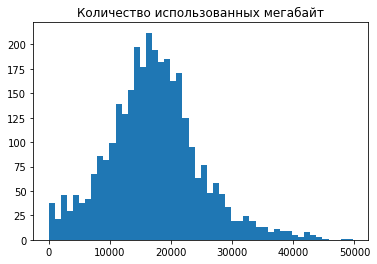

In [46]:
plt.hist(user_spending['mb_used'], bins=50)
plt.title('Количество использованных мегабайт')
plt.show()

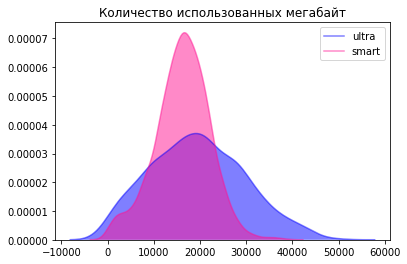

In [47]:
sns.kdeplot(user_spending.loc[user_spending['tariff_name'] == 'ultra','mb_used'],
            color='blue',
            shade=True,
            alpha = 0.5,
            label = 'ultra')
sns.kdeplot(user_spending.loc[user_spending['tariff_name'] == 'smart','mb_used'], color='deeppink',
            shade=True, 
            alpha = 0.5,
            label = 'smart')
plt.legend()
plt.title('Количество использованных мегабайт')
plt.show()

Более чем 75% пользователей тарифа 'ultra' хватает трафика который входит в тариф при этом самую большую плотность мы наблюдаем от 19 до 28 гб. С пользователями тарифа смарт обратная ситуация и большая часть пользователей превышает трафик включенный в тариф, наобольшая частота наблюдается около 17 гб.

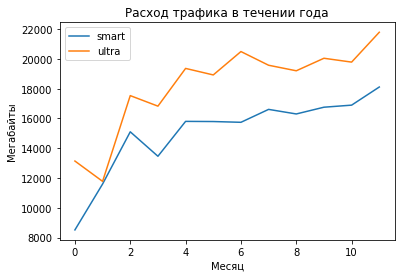

In [48]:
ultra_trafic_mean_gr = user_spending.loc[
    user_spending['tariff_name'] == 'ultra'].groupby('month', as_index=False)[['mb_used']].mean()
smart_trafic_mean_gr = user_spending.loc[
    user_spending['tariff_name'] == 'smart'].groupby('month', as_index=False)[['mb_used']].mean()

plt.plot(smart_trafic_mean_gr['mb_used'], label='smart')
plt.plot(ultra_trafic_mean_gr['mb_used'], label='ultra')
plt.xlabel('Месяц')
plt.ylabel('Мегабайты')
plt.title('Расход трафика в течении года')
plt.legend()
plt.show()

Исходя из графика мы видим что количество использованного трафика пользователей обоих тарифов постепенно увеличивается к концу года

In [49]:
user_spending.loc[user_spending['tariff_name'] == 'ultra','mb_used'].describe()

count      985.000000
mean     19469.308629
std      10087.197726
min          0.000000
25%      11771.000000
50%      19309.000000
75%      26838.000000
max      49746.000000
Name: mb_used, dtype: float64

In [50]:
user_spending.loc[user_spending['tariff_name'] == 'smart','mb_used'].describe()

count     2229.000000
mean     16208.873486
std       5870.482332
min          0.000000
25%      12644.000000
50%      16507.000000
75%      20043.000000
max      38553.000000
Name: mb_used, dtype: float64

In [51]:
print('Дисперсия: {:.2f}'.format(np.var(user_spending.loc[user_spending['tariff_name'] == 'ultra','mb_used'], ddof=1)))

Дисперсия: 101751557.97


In [52]:
print('Дисперсия: {:.2f}'.format(np.var(user_spending.loc[user_spending['tariff_name'] == 'smart','mb_used'], ddof=1)))

Дисперсия: 34462562.81


#### Вывод

В обоих случаях среднее почти равно медиане, но при этом достаточно большое стандартное отклонение говорит нам о том что пользователи достаточно по разному расходуют трафик. В большинстве своем людям требуется от 17 до 19 гигабайт в зависивости от тарифа.

### Данные о сообщениях

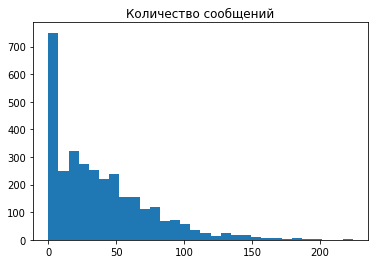

In [53]:
plt.hist(user_spending['messages_count'], bins=30)
plt.title('Количество сообщений')
plt.show()

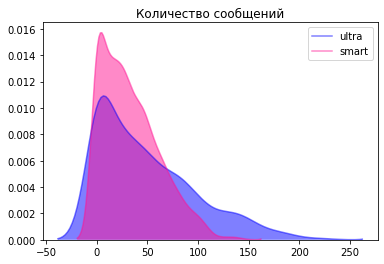

In [54]:
sns.kdeplot(user_spending.loc[user_spending['tariff_name'] == 'ultra','messages_count'],
            color='blue',
            shade=True,
            alpha = 0.5,
            label = 'ultra')
sns.kdeplot(user_spending.loc[user_spending['tariff_name'] == 'smart','messages_count'], color='deeppink',
            shade=True, 
            alpha = 0.5,
            label = 'smart')
plt.legend()
plt.title('Количество сообщений')
plt.show()

Около 70% пользователей тарифа 'smart' вкладываются в лимит влюченных в тариф сообщений, при этом наибольшую плотности мы наблюдаем около 35 сообщений. Последнее верно и для пользователей тарифа ультра однако здесь график скошен вправо что говорит на о том что срееднее больше медианы.

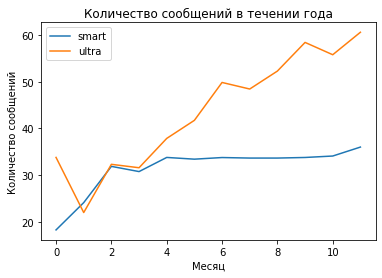

In [55]:
ultra_mes_mean_gr = user_spending.loc[
    user_spending['tariff_name'] == 'ultra'].groupby('month', as_index=False)[['messages_count']].mean()
smart_mes_mean_gr = user_spending.loc[
    user_spending['tariff_name'] == 'smart'].groupby('month', as_index=False)[['messages_count']].mean()

plt.plot(smart_mes_mean_gr['messages_count'], label='smart')
plt.plot(ultra_mes_mean_gr['messages_count'], label='ultra')
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений')
plt.title('Количество сообщений в течении года')
plt.legend()
plt.show()

Количество сообщений так же постепенно увеличивается к концу года

In [56]:
user_spending.loc[user_spending['tariff_name'] == 'ultra','messages_count'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_count, dtype: float64

In [57]:
user_spending.loc[user_spending['tariff_name'] == 'smart','messages_count'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

In [58]:
print('Дисперсия: {:.2f}'.format(np.var(user_spending.loc[user_spending['tariff_name'] == 'ultra','messages_count'], ddof=1)))

Дисперсия: 2285.27


In [59]:
print('Дисперсия: {:.2f}'.format(np.var(user_spending.loc[user_spending['tariff_name'] == 'smart','messages_count'], ddof=1)))

Дисперсия: 796.81


#### Вывод

Среднее достаточно сильно отличается от медианы в данных пользователей тарифа 'ultra' а так же присутствует большое стандартное отклонение о чем нам так же говорит график скошенный вправо. В ситуации с тарифом 'smart' отсутствует такой сильй скос однако среднее всеже чуть болше медианы. Исходя данных мы можем сделать вывод что люди редно пишут более 60 сообщений в месяц. При это наибольшая плотность от 1 до 50.

### Выручка

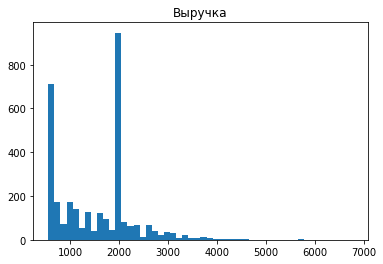

In [60]:
plt.hist(user_spending['cost_per_month'], bins=50)
plt.title('Выручка')
plt.show()

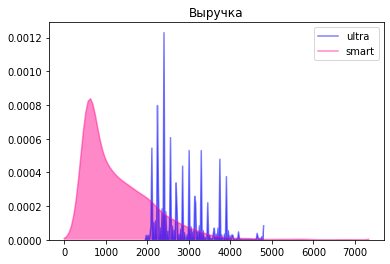

In [61]:
sns.kdeplot(user_spending.loc[user_spending['tariff_name'] == 'ultra','cost_per_month'],
            color='blue',
            shade=True,
            alpha = 0.5,
            label = 'ultra')
sns.kdeplot(user_spending.loc[user_spending['tariff_name'] == 'smart','cost_per_month'], color='deeppink',
            shade=True, 
            alpha = 0.5,
            label = 'smart')
plt.legend()
plt.title('Выручка')
plt.show()

Высокая плотность около 2000 тысяч говорит нам о том что 75% всех пользователей тарифа ультра не выходят за рамки тарифа и платят только абонентскую плату. А выскоя плотность от 500 до 1000 говорит нам о том что большая часть всех абонентав тарифа смарт преввышает включенный в тариф пакет.

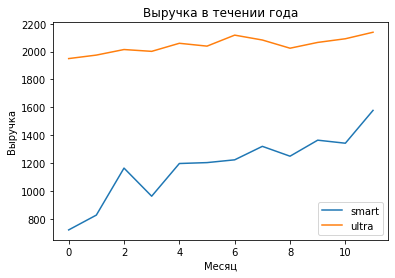

In [62]:
ultra_cost_mean_gr = user_spending.loc[
    user_spending['tariff_name'] == 'ultra'].groupby('month', as_index=False)[['cost_per_month']].mean()
smart_cost_mean_gr = user_spending.loc[
    user_spending['tariff_name'] == 'smart'].groupby('month', as_index=False)[['cost_per_month']].mean()

plt.plot(smart_cost_mean_gr['cost_per_month'], label='smart')
plt.plot(ultra_cost_mean_gr['cost_per_month'], label='ultra')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title('Выручка в течении года')
plt.legend()
plt.show()

Исходя из графика мы видим что выручка абонентов тарифа ультра в течении года меняется не сильно, в отличии от тарифа смарт где она постепенно растет к концу года.

In [63]:
user_spending.loc[user_spending['tariff_name'] == 'ultra','cost_per_month'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: cost_per_month, dtype: float64

In [64]:
user_spending.loc[user_spending['tariff_name'] == 'smart','cost_per_month'].describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: cost_per_month, dtype: float64

In [65]:
print('Дисперсия: {:.2f}'.format(np.var(user_spending.loc[user_spending['tariff_name'] == 'ultra','cost_per_month'], ddof=1)))

Дисперсия: 141516.75


In [66]:
print('Дисперсия: {:.2f}'.format(np.var(user_spending.loc[user_spending['tariff_name'] == 'smart','cost_per_month'], ddof=1)))

Дисперсия: 669785.71


In [67]:
print('Сумарная выручка пользователей тарифа "Ультра":', 
      user_spending.loc[user_spending['tariff_name'] == 'ultra','cost_per_month'].sum())
print('Количество пользователей тарифа "Ультра":', 
     user_spending.loc[user_spending['tariff_name'] == 'ultra','cost_per_month'].count())
print('Сумарная выручка пользователей тарифа "Смарт":', 
      user_spending.loc[user_spending['tariff_name'] == 'smart','cost_per_month'].sum())
print('Количество пользователей тарифа "Смарт":', 
     user_spending.loc[user_spending['tariff_name'] == 'smart','cost_per_month'].count())

Сумарная выручка пользователей тарифа "Ультра": 2039100.0
Количество пользователей тарифа "Ультра": 985
Сумарная выручка пользователей тарифа "Смарт": 2875351.0
Количество пользователей тарифа "Смарт": 2229


#### Вывод 

В большинстве своем пользователи тарифа ультра платят только абонетскую плату. Чего не скажеш о пользователях тарифа смарт которые в среднем платят в два раза больше абонентской платы.

## Проверка гипотиз

### Гипотеза 1

Узнаем отличается ли средняя выручка пользователей тарифа 'smart' и 'ultra'.

Зададим критический уровень статистической значимости проведем т-тест и расчитаем p-value.

In [68]:
alpha = 0.05
result = st.ttest_ind(user_spending.loc[user_spending['tariff_name'] == 'ultra','cost_per_month'],
                      user_spending.loc[user_spending['tariff_name'] == 'smart','cost_per_month']) 

Сформулируем гипотезы. H0 - средняя выручка тарифа 'ultra'  не отличается от средней выручки тарифа 'smart'. H1 - средняя выручка тарифа 'ultra' отличается от средней выручки тарифа 'smart'

In [69]:
print('p-value:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


#### Вывод

Исходя из проверки мы можем утверждать что средние выручки тарифов отличаются.

### Гипотеза 2

Узнаем отличается ли средняя выручка пользователей из Москвы от средней выручки пользователей из других регионов.

In [70]:
revenue_moscow = user_spending.loc[user_spending['city'] == 'Москва', 'cost_per_month']
revenue_other = user_spending.loc[user_spending['city'] != 'Москва', 'cost_per_month']

Зададим критический уровень статистической значимости, проведем т-тест и расчитаем p-value.

In [71]:
alpha = 0.05

result = st.ttest_ind(revenue_moscow, revenue_other)

Сформулируем нулевую гипотезу. Н0 - средняя выручка по Москве не отличается от средней выручки в других регионах. Н1- средняя выручка по Москве отличается от средней выручки в других регионах

In [72]:
print('p-value:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Наша нулевая гипотеза - средняя выручка по Москве не отличается от средней выручки в других регионах. Исходя из проверки не получилось отвергнуть нулевую гипотезу.

## Общий вывод

Исходя из данных данной выборки мы видим что пользователи тарифа 'ultra' в среднем тратят больше минут, но длительность разговоров крайне редко превышает 1500 соответственно пользователи редко использую хотя бы половину включенных в тариф минут. С пользователями тарифа 'smart' другая ситуация по большей части они гораздо ближе к предельному значению включенных в тариф минут. Так же более чем 75% пользователей тарифа 'ultra' хватает трафика который входит в тариф при этом самую большую плотность мы наблюдаем от 19 до 28 гб. С пользователями тарифа смарт обратная ситуация и большая часть пользователей превышает трафик включенный в тариф, наибольшая плотность частоты наблюдается около 17 гб. Около 70% пользователей тарифа 'smart' вкладываются в лимит влюченных в тариф сообщений, при этом наибольшую плотности мы наблюдаем около 35 сообщений. Последнее верно и для пользователей тарифа ультра однако здесь график скошен вправо что говорит на о том что срееднее больше медианы.
75% всех пользователей тарифа ультра не выходят за рамки тарифа и платят только абонентскую плату. Исходя из данных мы можем сказать о том что большая часть всех абонентав тарифа смарт преввышает включенный в тариф пакет, и в среднем платит в два раза больше абонетской платы.

Исходя из проверки гипотезы мы можем утверждать что средние выручки тарифов отличаются. И наоборот если говорить о гипотезе что средняя выручка по Москве не отличается от средней выручки в других регионах, в ходе проверки не получилось отвергнуть данную гипотезу.

Подводя итог можно сказать что выгоднее продвигать тариф 'ultra', так как мы можем предположить что его средняя выручка выше и она не зависит от региона.